In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read Data from directory
data = pd.read_csv('../input/brainstroke/brain_stroke.csv')

In [3]:
#View First 10 row of dataframe
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [4]:
data.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [5]:
#Checking data shape
data.shape

(4981, 11)

In [6]:
#Checking for the dataset feature
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
#Data 

In [8]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [10]:
#Check statisical description
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [11]:
#Number of unique class for each feature
data.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [12]:
data_cat = data[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                 'smoking_status', 'stroke']]

In [13]:
for i in data_cat.columns:
    print(data_cat[i].unique())

['Male' 'Female']
[0 1]
[1 0]
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[1 0]


In [14]:
for i in data_cat.columns:
    print(data_cat[i].value_counts())

gender
Female    2907
Male      2074
Name: count, dtype: int64
hypertension
0    4502
1     479
Name: count, dtype: int64
heart_disease
0    4706
1     275
Name: count, dtype: int64
ever_married
Yes    3280
No     1701
Name: count, dtype: int64
work_type
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: count, dtype: int64
Residence_type
Urban    2532
Rural    2449
Name: count, dtype: int64
smoking_status
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: count, dtype: int64
stroke
0    4733
1     248
Name: count, dtype: int64


In [15]:
categorical = data.select_dtypes(include= 'object')
categorical

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Male,Yes,Private,Rural,never smoked
2,Female,Yes,Private,Urban,smokes
3,Female,Yes,Self-employed,Rural,never smoked
4,Male,Yes,Private,Urban,formerly smoked
...,...,...,...,...,...
4976,Male,No,Private,Rural,formerly smoked
4977,Male,Yes,Private,Urban,smokes
4978,Female,Yes,Govt_job,Rural,smokes
4979,Male,Yes,Private,Rural,smokes


In [16]:
numerical = data.select_dtypes(exclude= 'object')
numerical

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,80.0,0,1,105.92,32.5,1
2,49.0,0,0,171.23,34.4,1
3,79.0,1,0,174.12,24.0,1
4,81.0,0,0,186.21,29.0,1
...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,0
4977,40.0,0,0,191.15,31.1,0
4978,45.0,1,0,95.02,31.8,0
4979,40.0,0,0,83.94,30.0,0


<Axes: >

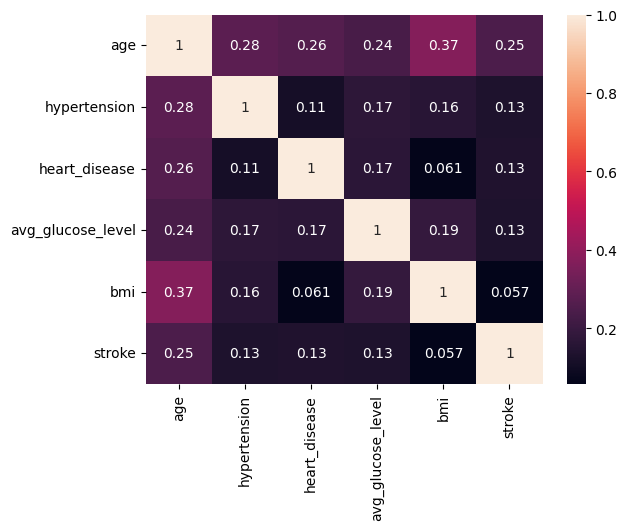

In [17]:
sns.heatmap(numerical.corr(), cbar = True, annot = True)

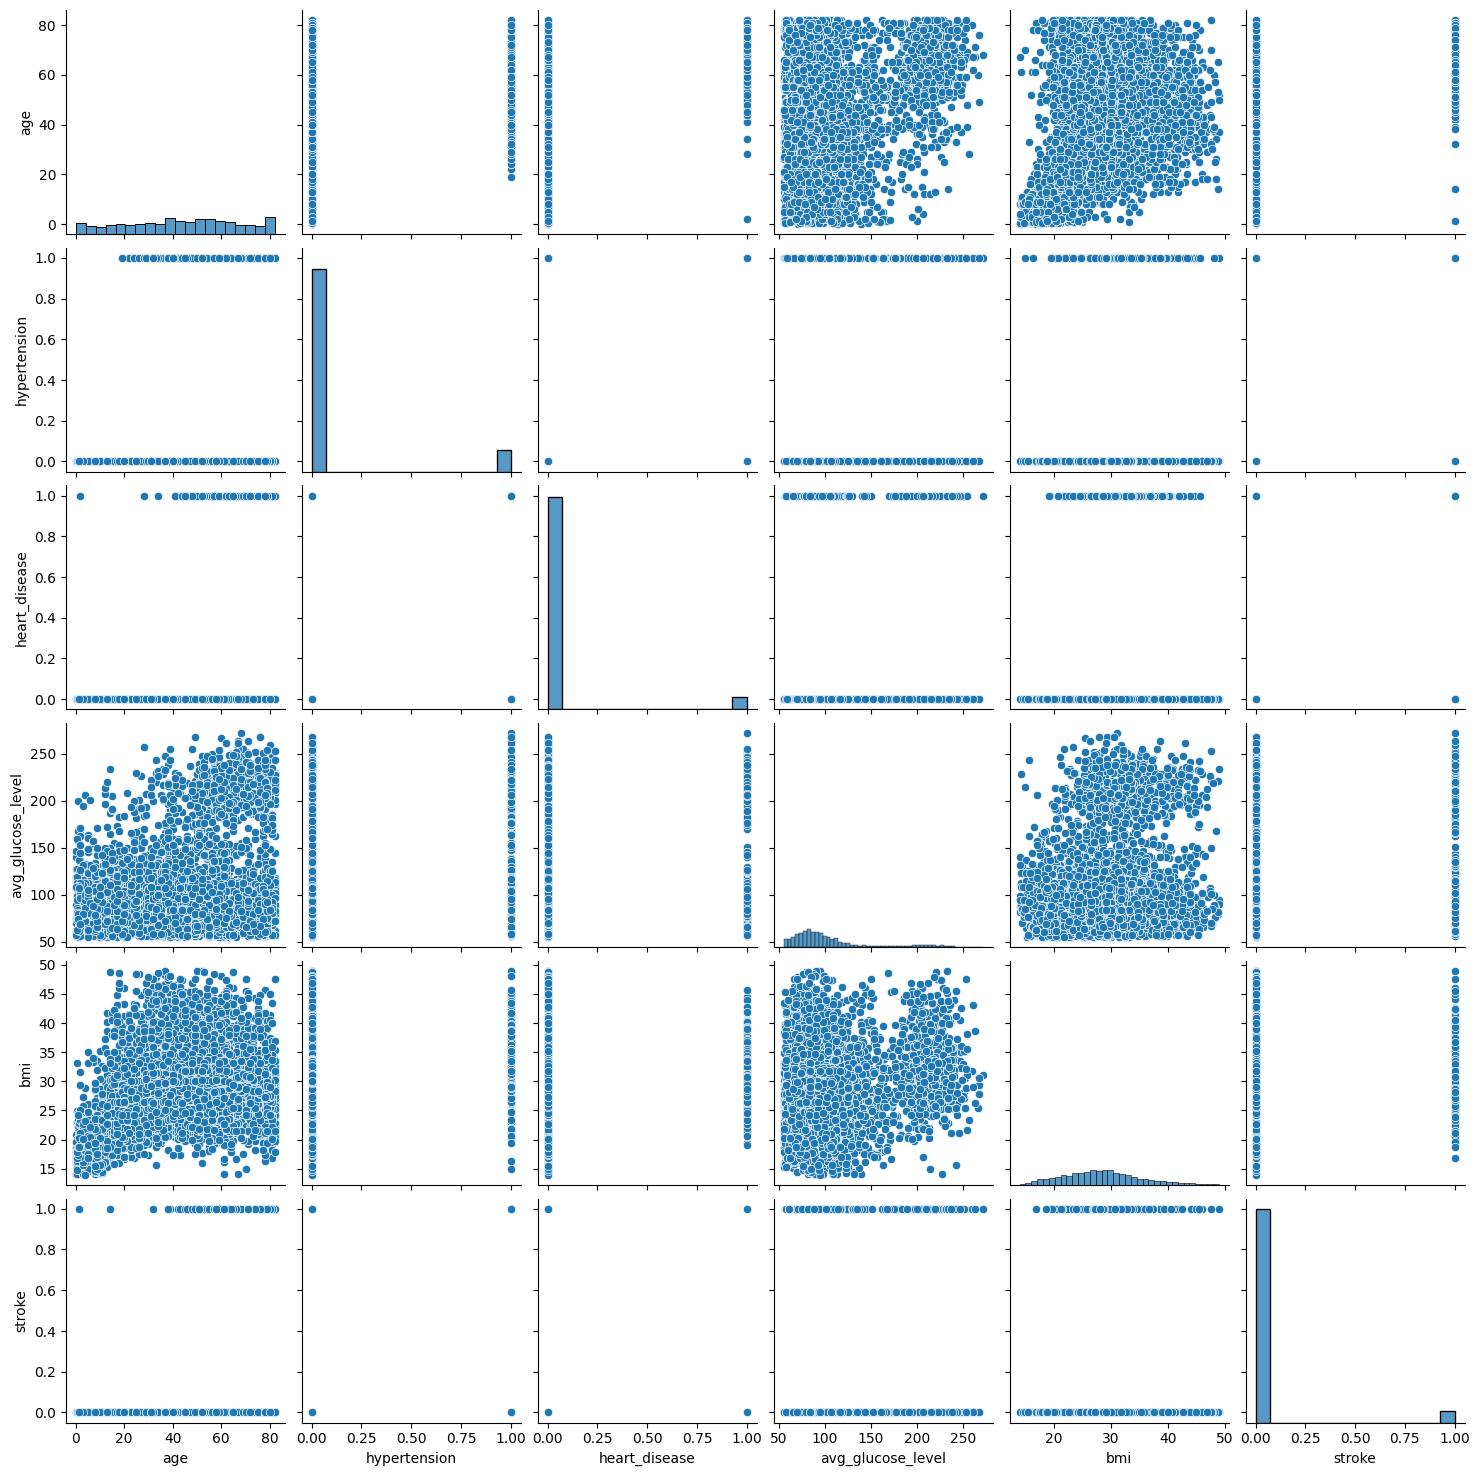

In [18]:
sns.pairplot(data)

In [19]:
data.corr

<bound method DataFrame.corr of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type

In [20]:
from ydata_profiling import ProfileReport
profiler = (ProfileReport(data, title="Brain Stroke preidction Dataset Visual information"))

In [21]:
profiler

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

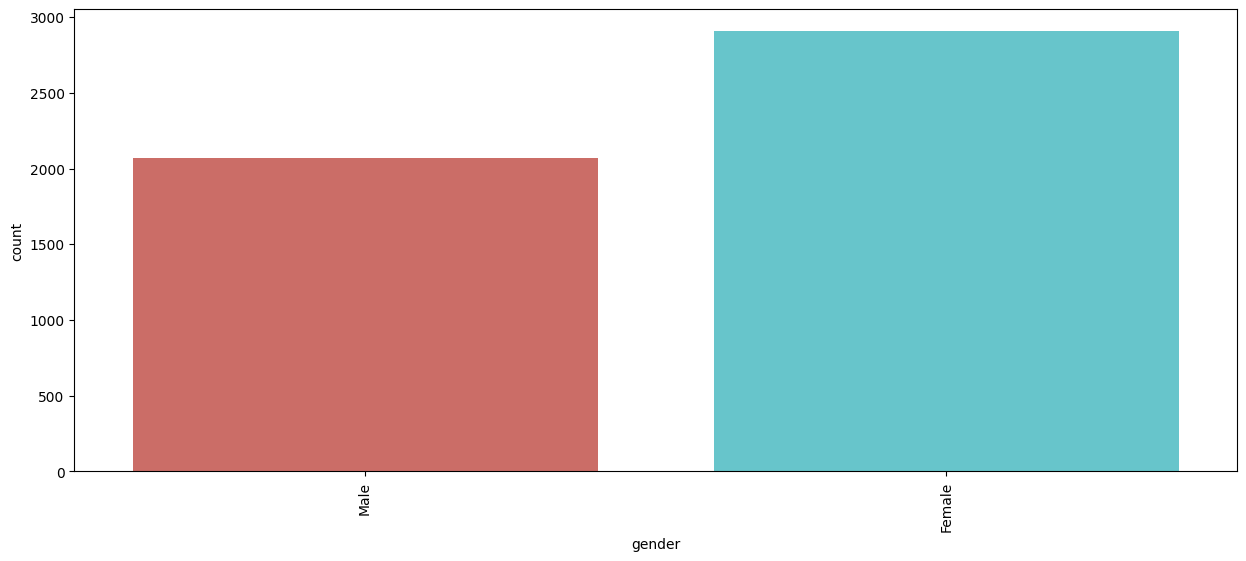

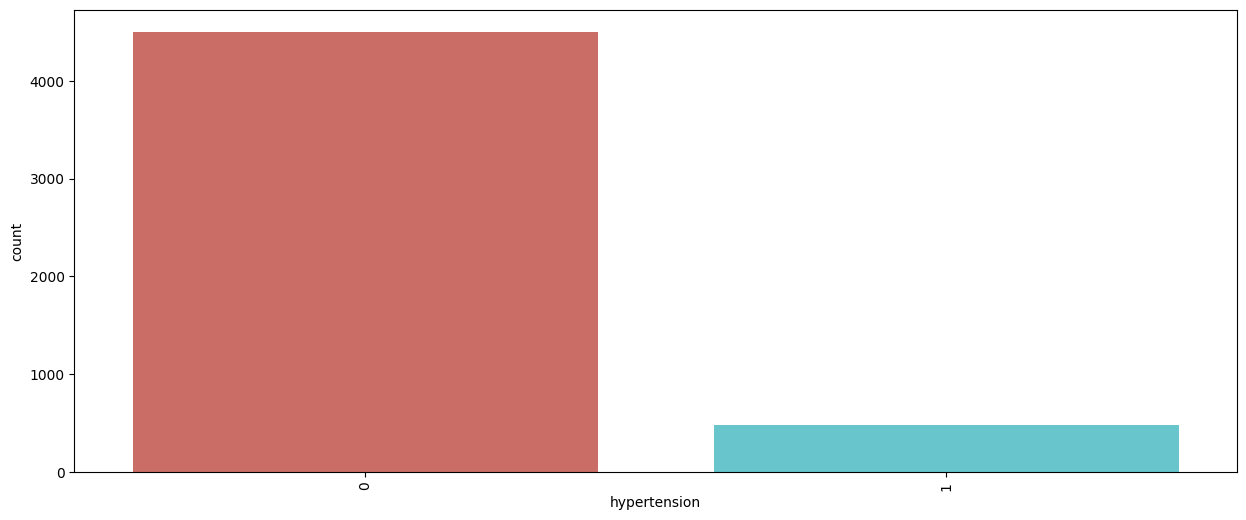

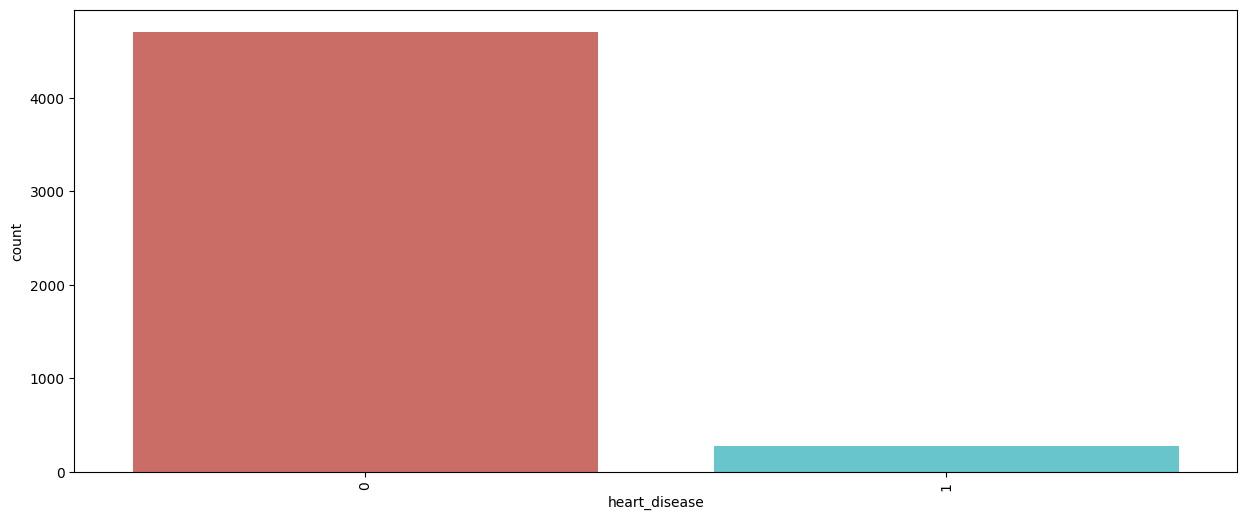

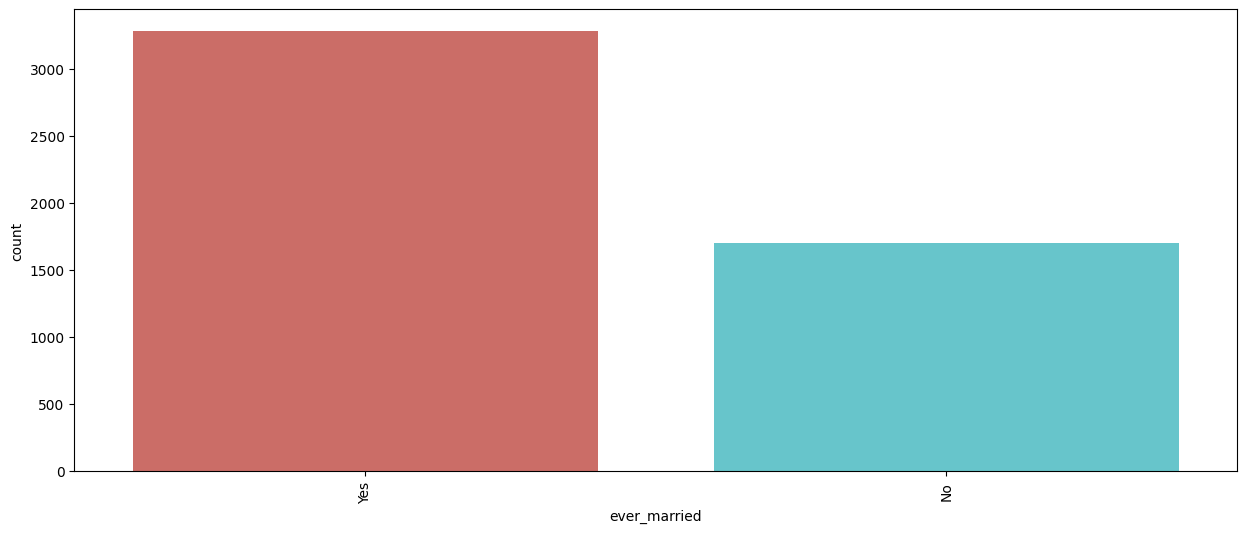

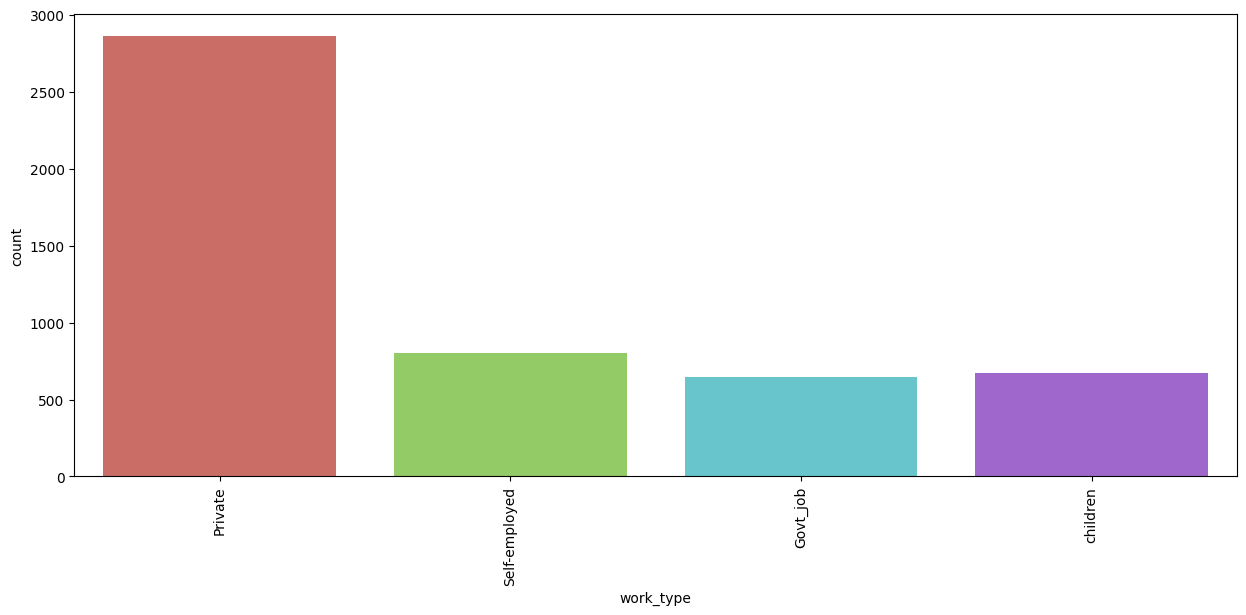

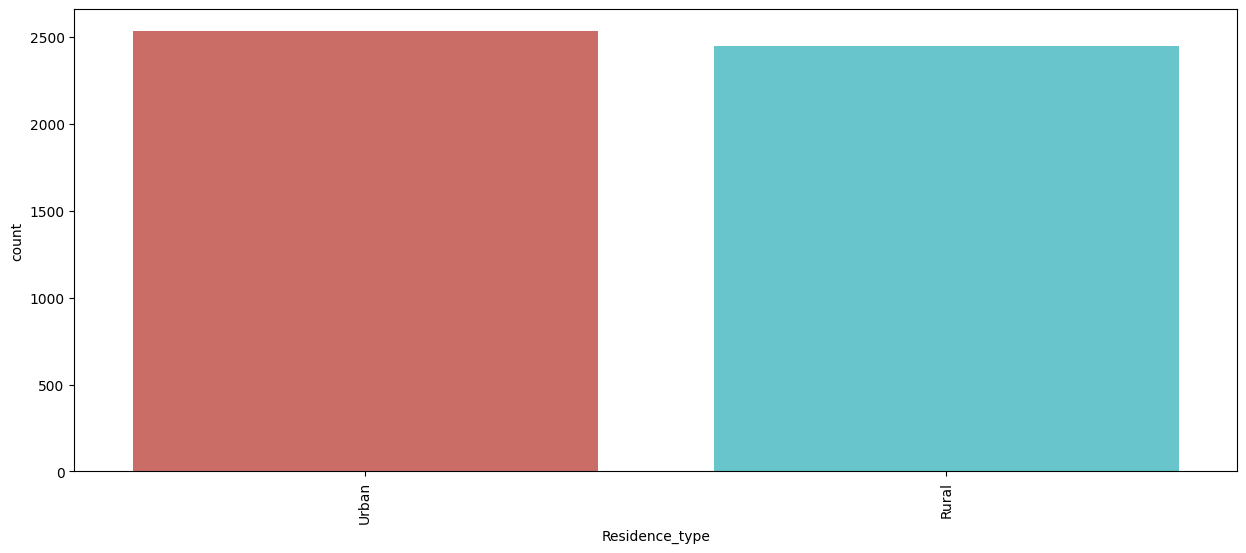

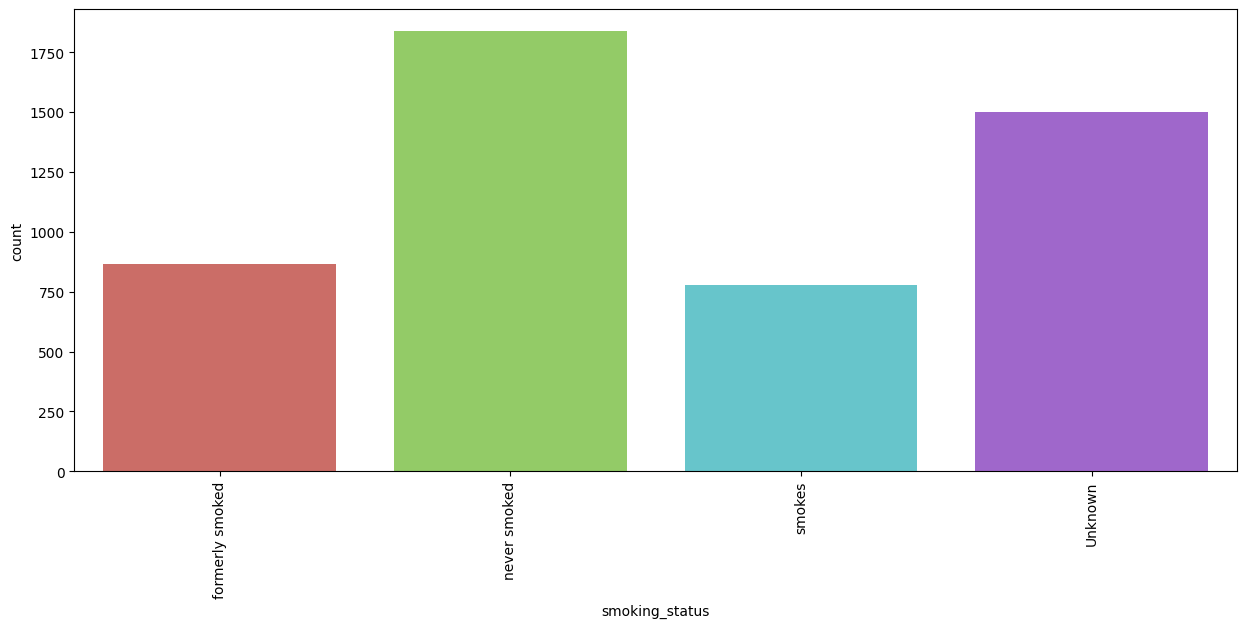

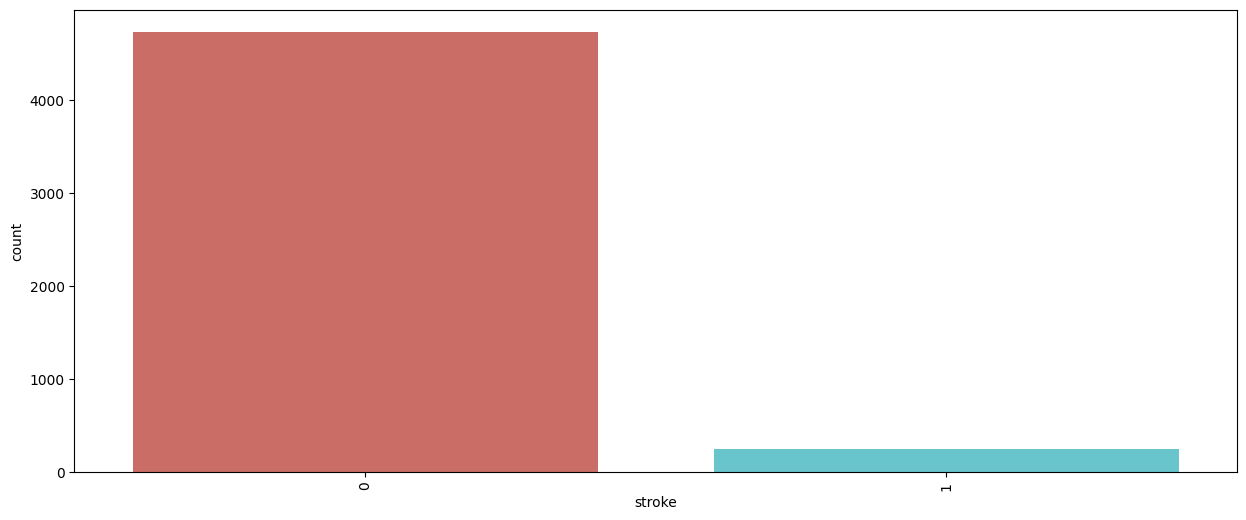

In [22]:


for i in data_cat.columns:
    plt.figure(figsize=(15, 6))
    sns.countplot(x=i, data=data_cat, palette='hls')
    plt.xticks(rotation=90)
    plt.show()


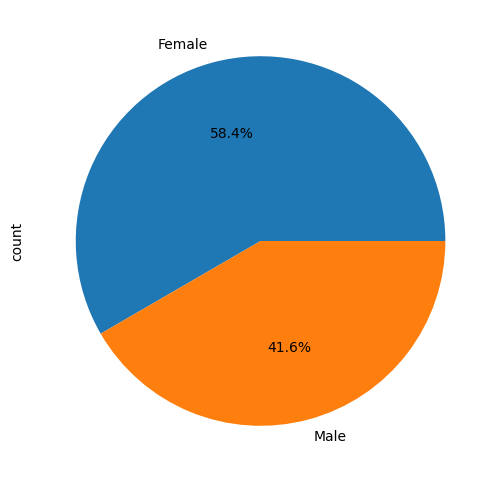

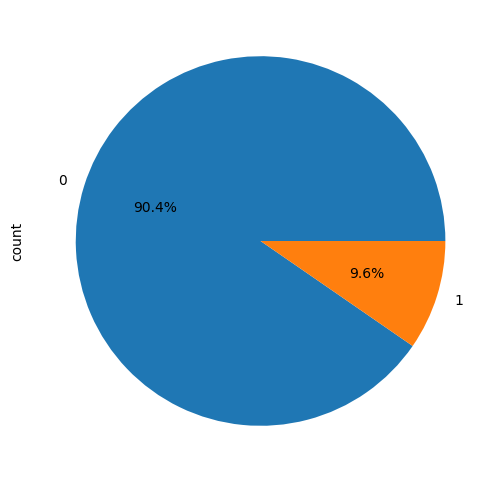

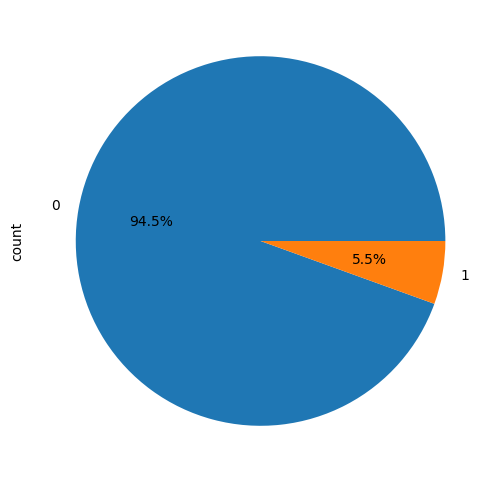

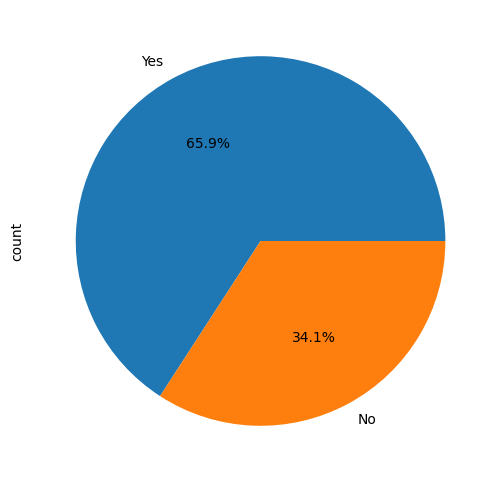

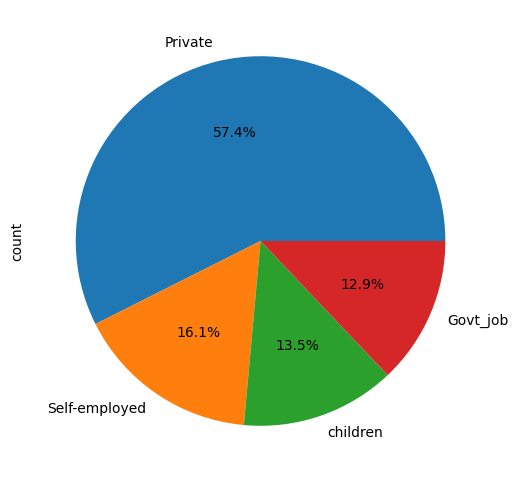

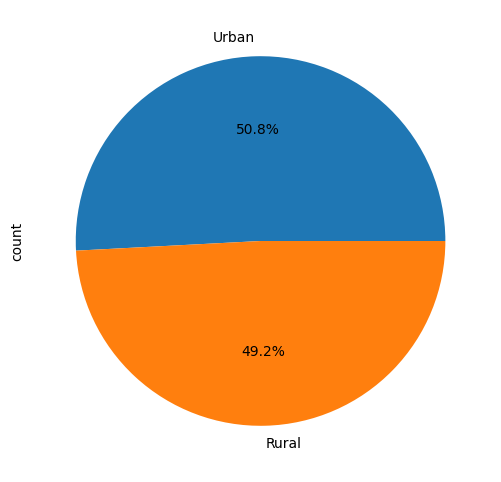

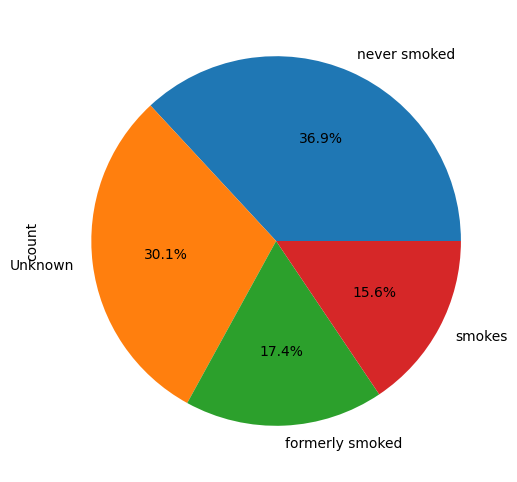

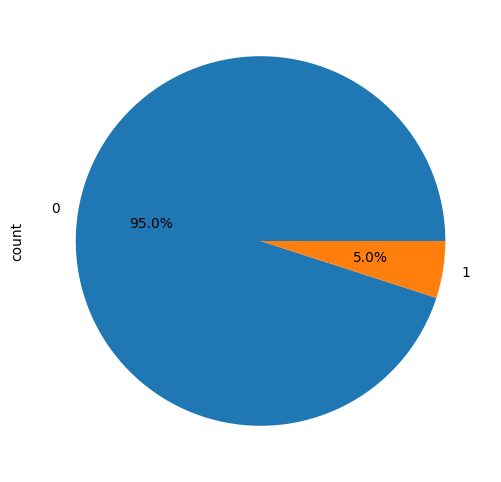

In [23]:


for i in data_cat.columns:
    plt.figure(figsize = (15,6))
    data_cat[i].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
    plt.xticks(rotation = 90)
    plt.show()

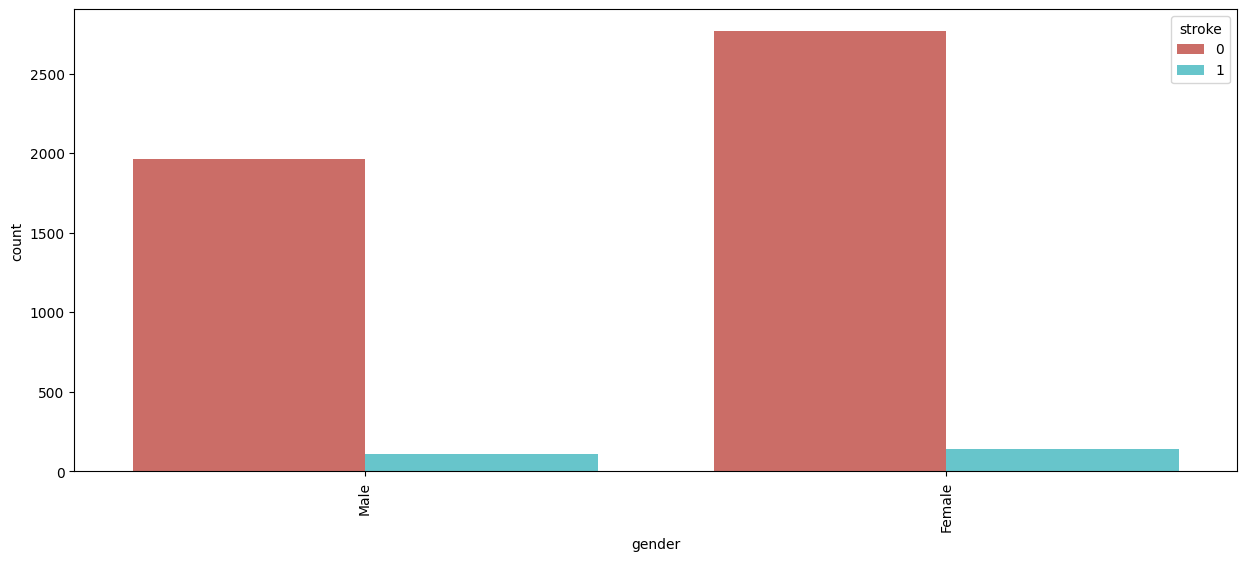

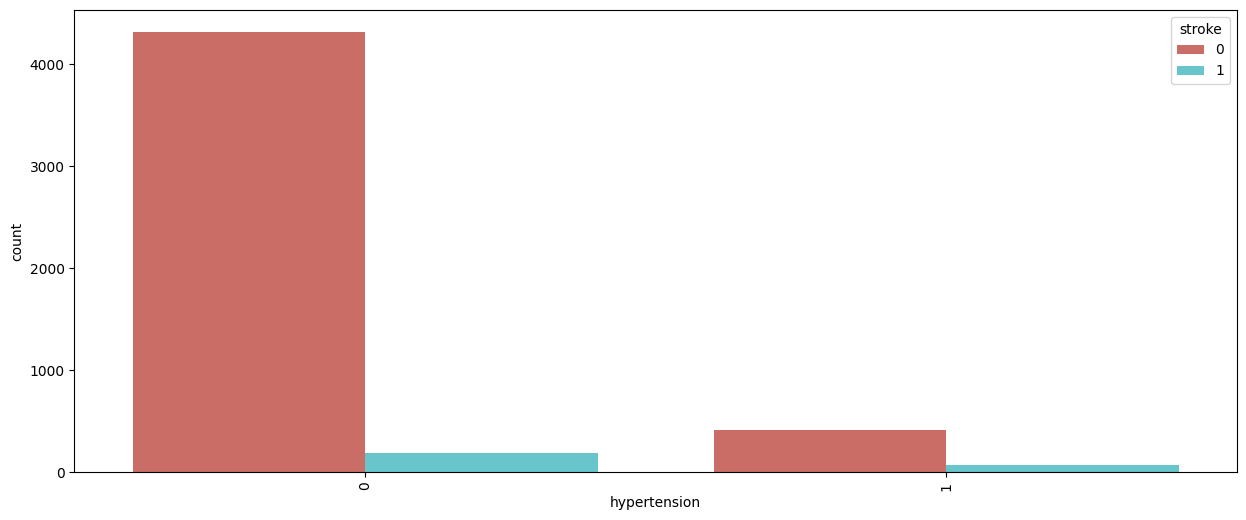

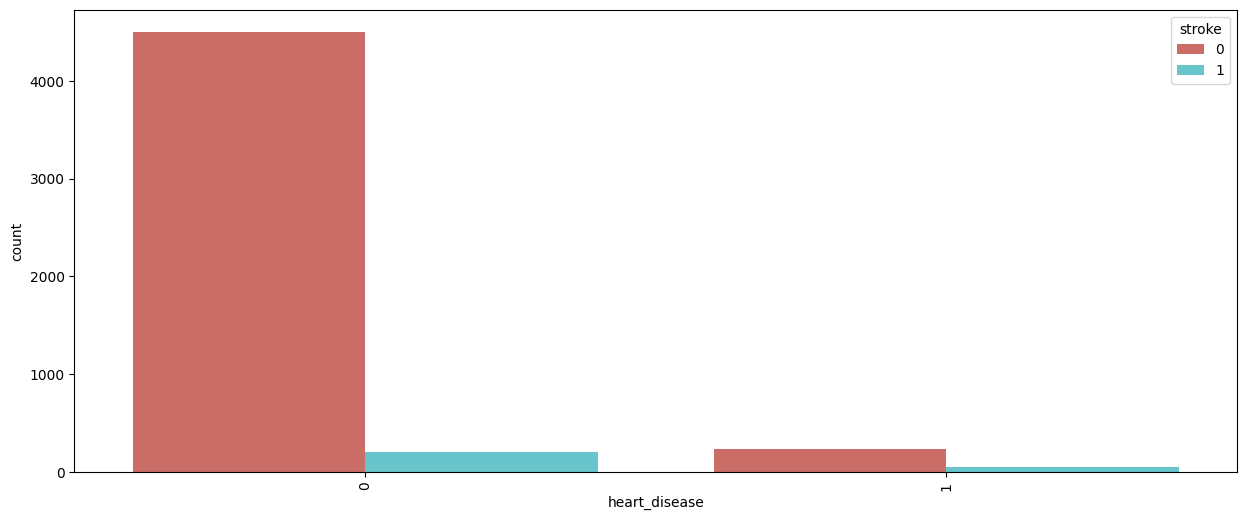

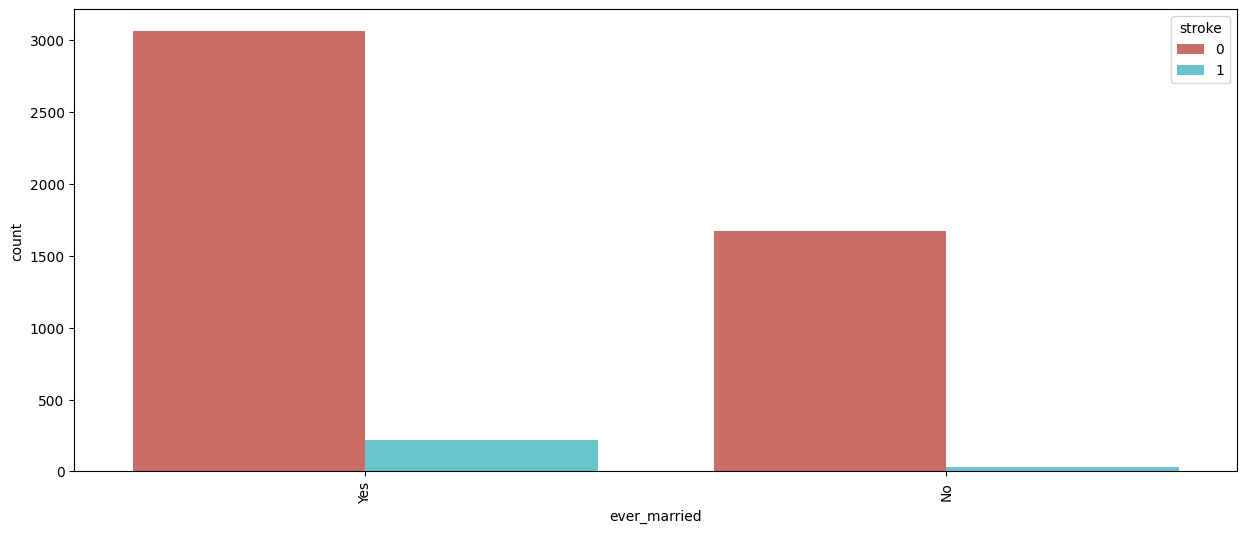

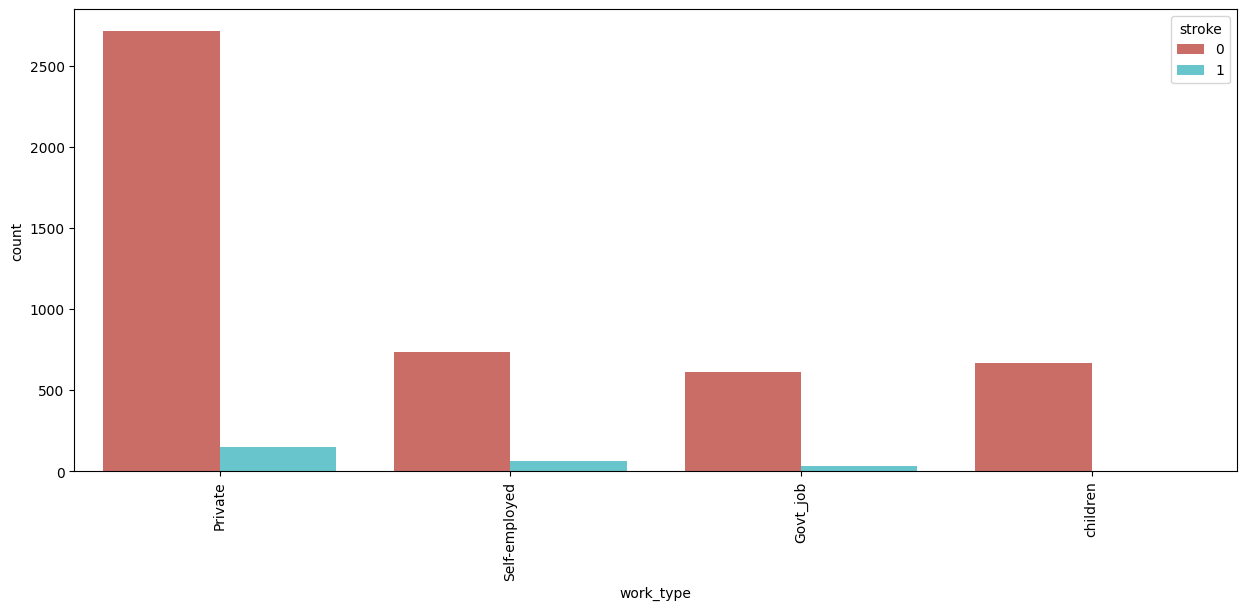

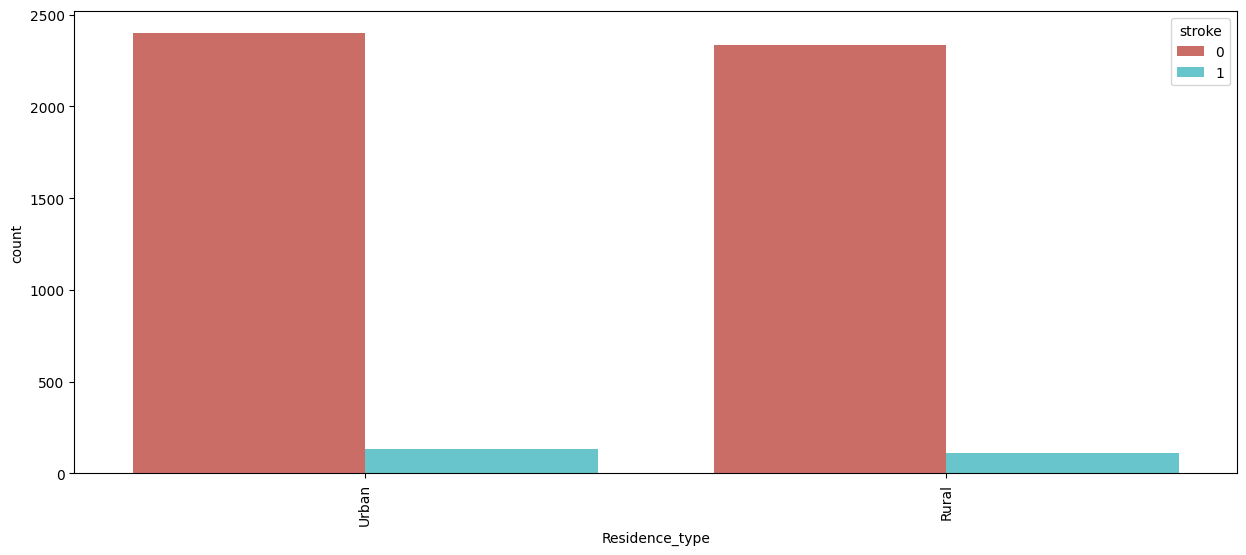

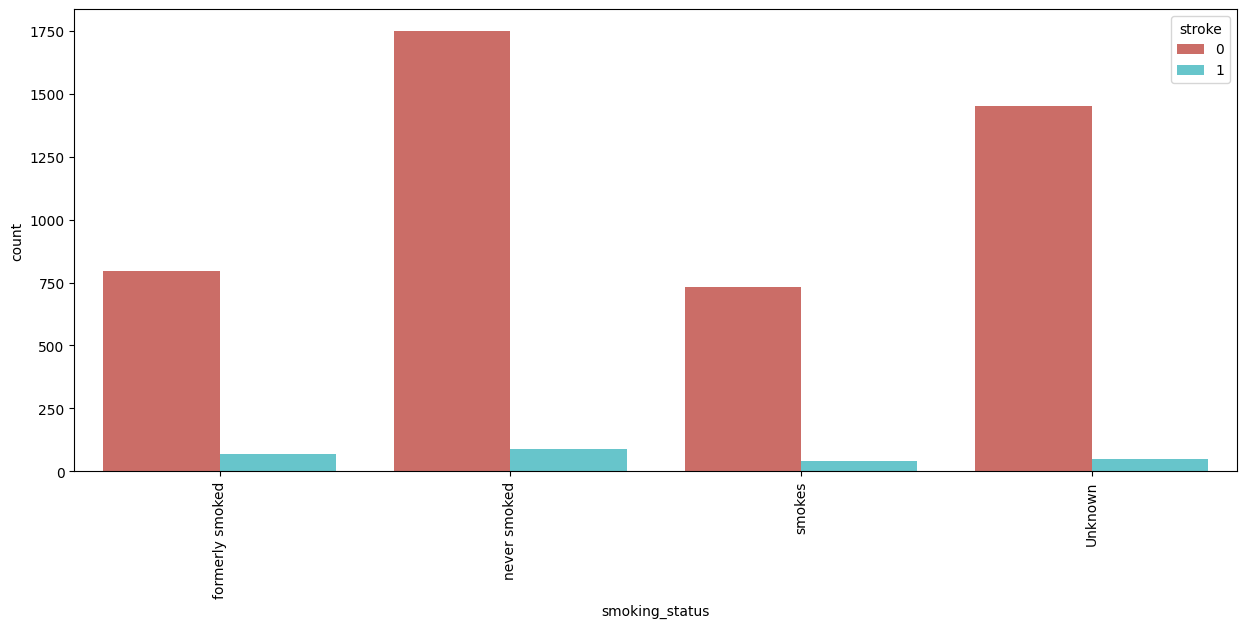

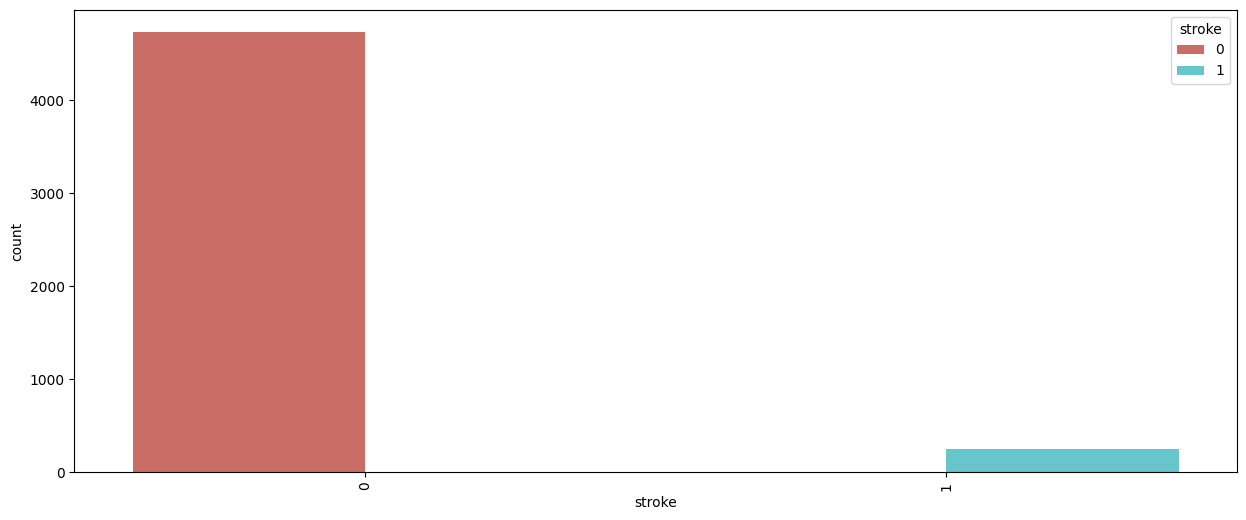

In [24]:
for i in data_cat.columns:
    plt.figure(figsize = (15,6))
    sns.countplot(x=i, data = data_cat, hue = 'stroke' , palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

In [25]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

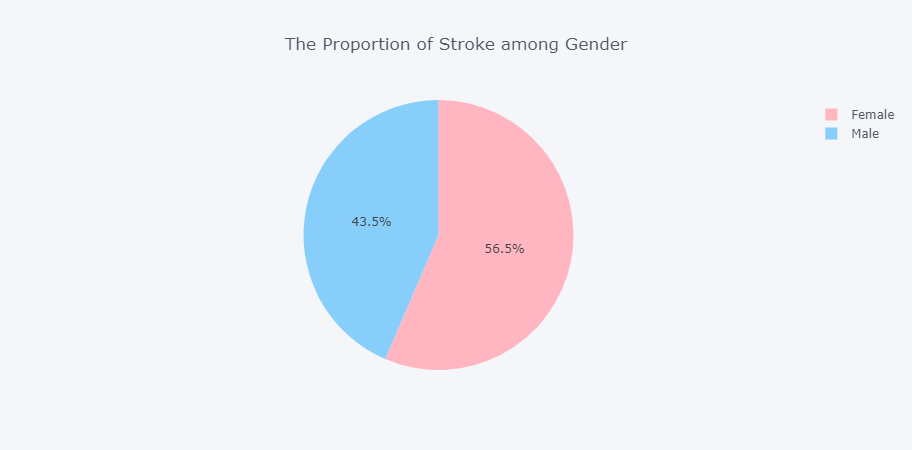

In [26]:
gender = data.groupby(data['gender'])['stroke'].sum()
data_gender = pd.DataFrame({'labels': gender.index,
                   'values': gender.values
                  })
colors = ['lightpink', 'lightskyblue']
data_gender.iplot(kind='pie',labels='labels',values='values', title='The Proportion of Stroke among Gender', colors = colors)


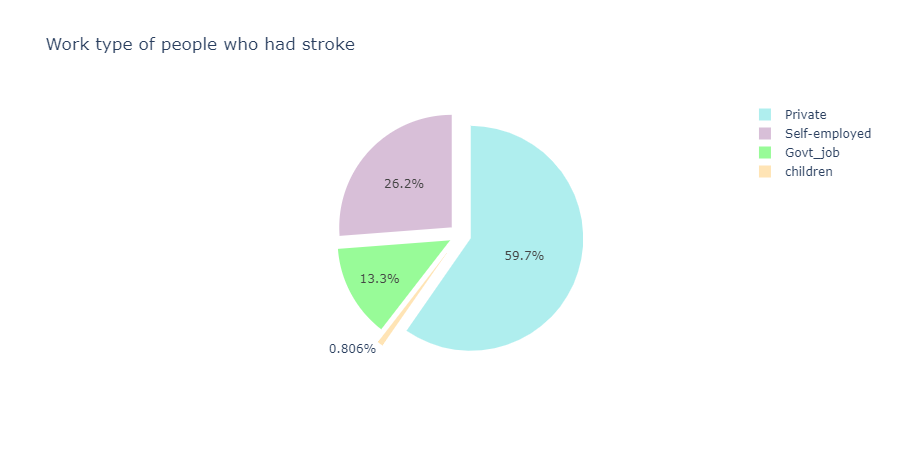

In [27]:
import pandas as pd
import plotly.graph_objs as go

job = data.groupby(data['work_type'])['stroke'].sum()
data_job = pd.DataFrame({'labels': job.index, 'values': job.values})

colors2 = ['palegreen', 'paleturquoise', 'thistle', 'moccasin']

fig = go.Figure(data=[go.Pie(labels=data_job['labels'], 
                             values=data_job['values'],
                             pull=[0.1, 0.1, 0.1, 0.2],
                             marker=dict(colors=colors2))])

fig.update_layout(title='Work type of people who had stroke')
fig.show()





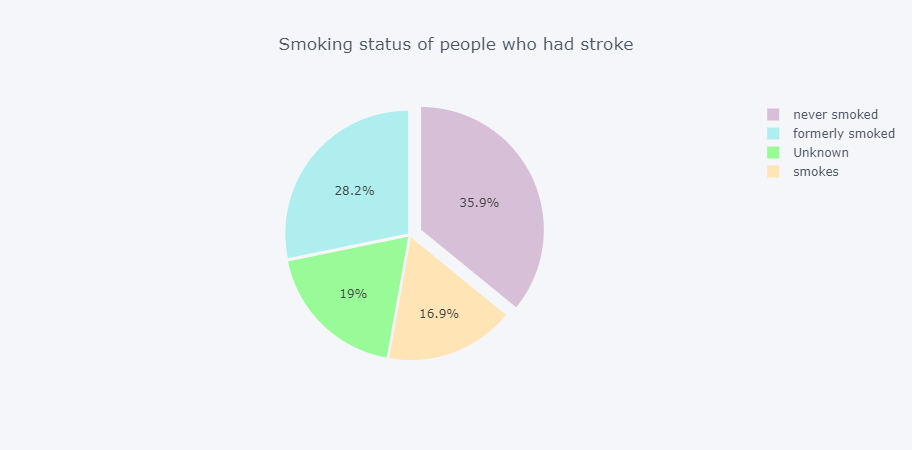

In [28]:
smoke = data.groupby(data['smoking_status'])['stroke'].sum()
data_smoke = pd.DataFrame({'labels': smoke.index,
                   'values': smoke.values
                  })
data_smoke.iplot(kind='pie',labels='labels',values='values', title='Smoking status of people who had stroke', colors = colors2, 
            pull=[0.02, 0.02, 0.1, 0.02])

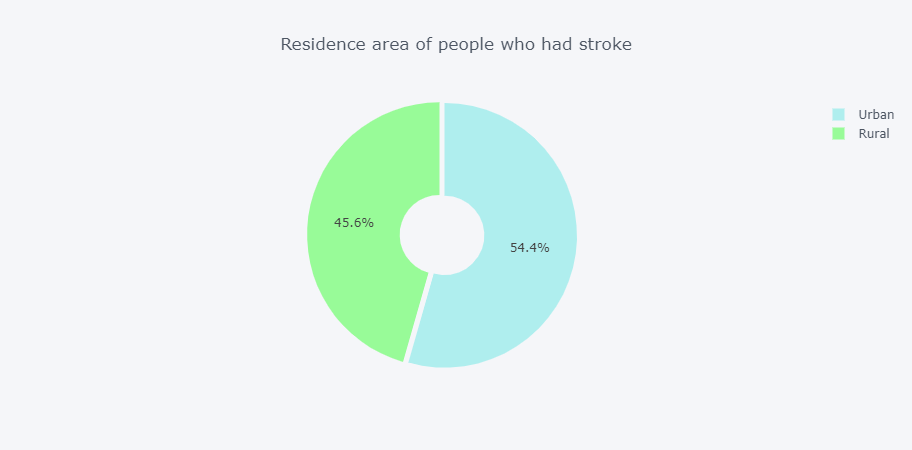

In [29]:
Residence = data.groupby(data['Residence_type'])['stroke'].sum()
data_Residence = pd.DataFrame({'labels': Residence.index,
                   'values': Residence.values
                  })
data_Residence.iplot(kind='pie',labels='labels',values='values', title='Residence area of people who had stroke', colors = colors2, 
            pull=[0.02, 0.02],hole = 0.3)

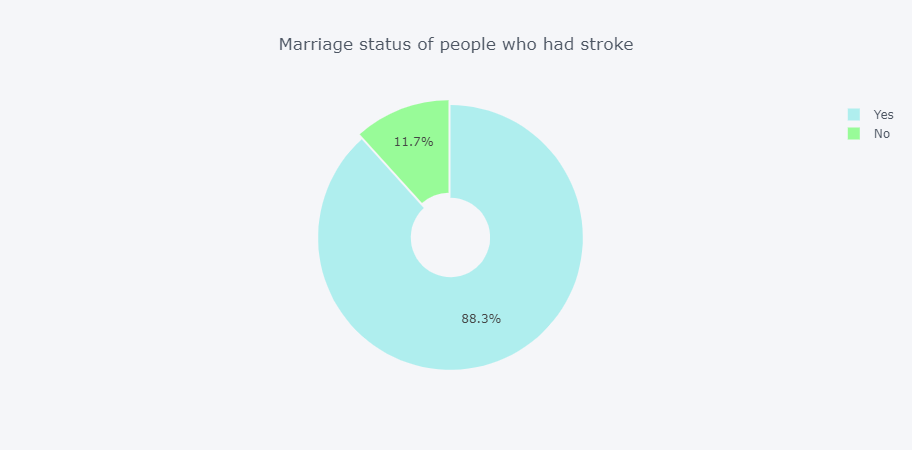

In [30]:
Married = data.groupby(data['ever_married'])['stroke'].sum()
data_Married = pd.DataFrame({'labels': Married.index,
                   'values': Married.values
                  })
data_Married.iplot(kind='pie',labels='labels',values='values', title='Marriage status of people who had stroke', colors = colors2, 
            pull=[0.02, 0.02],hole = 0.3)

In [31]:
data_num = data[['age', 'avg_glucose_level', 'bmi']]

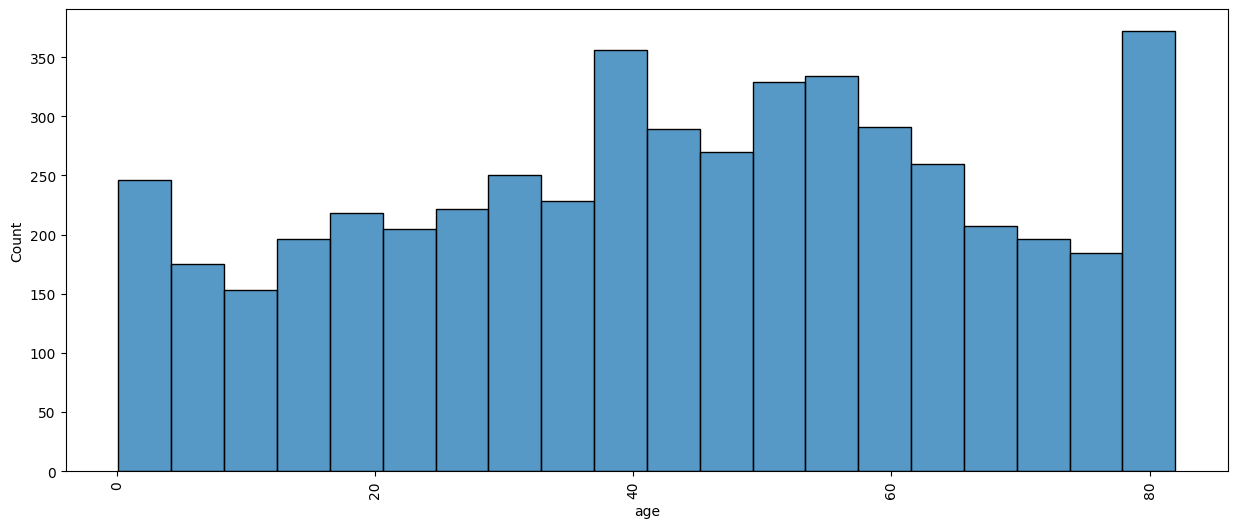

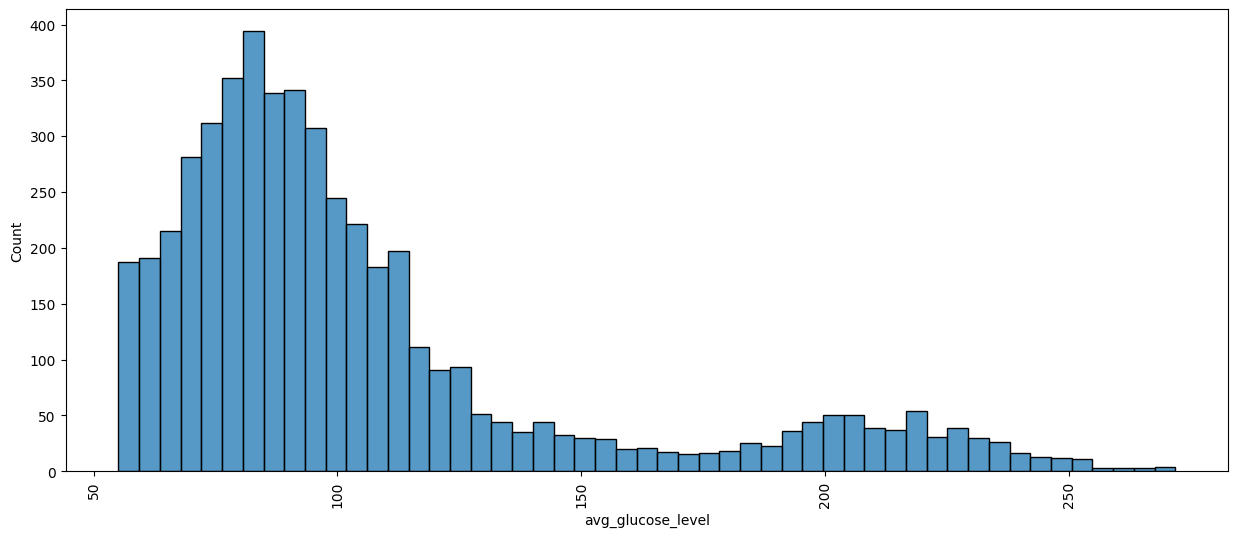

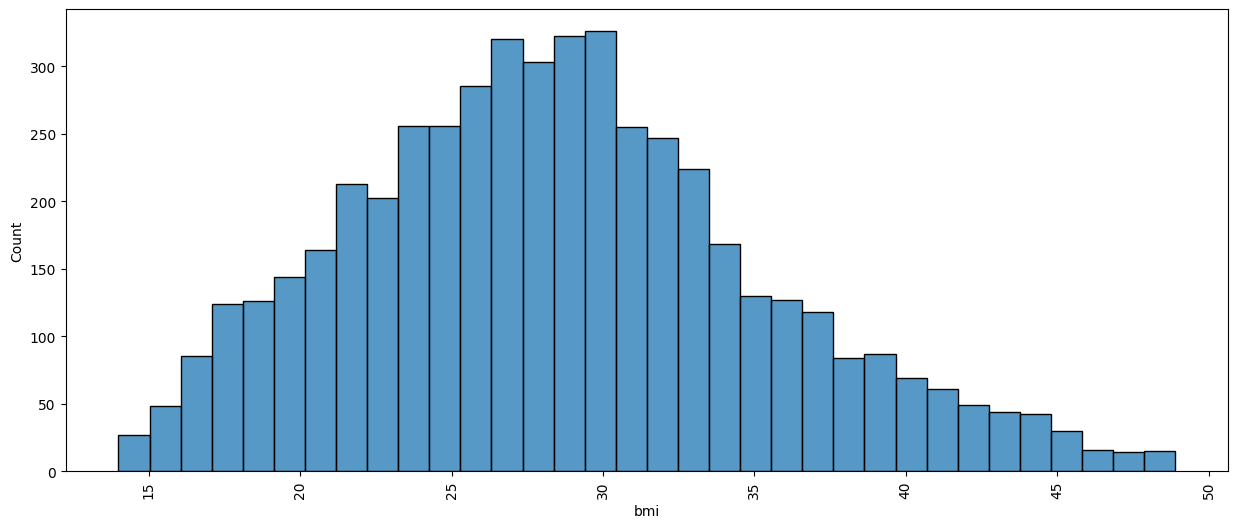

In [32]:
for i in data_num.columns:
    plt.figure(figsize = (15,6))
    sns.histplot(data_num[i], palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

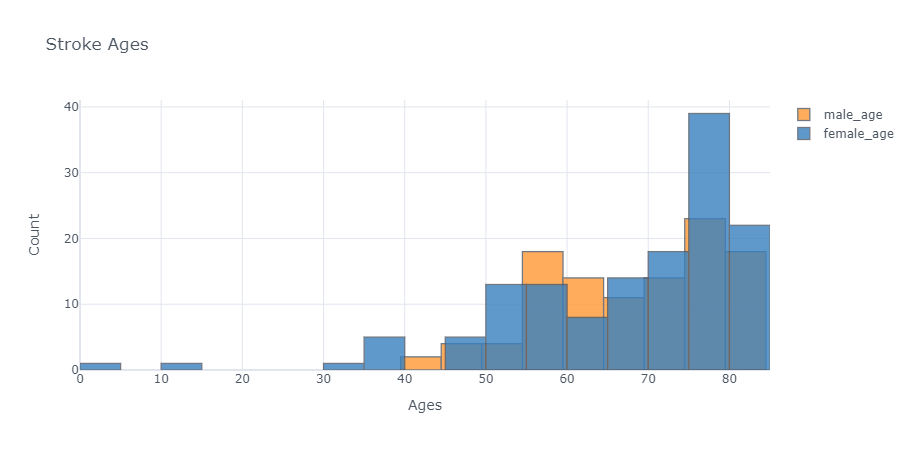

In [33]:
stroke = data.loc[data['stroke']== 1].reset_index()
stroke["male_age"]=stroke[stroke["gender"]=="Male"]["age"]
stroke["female_age"]=stroke[stroke["gender"]=="Female"]["age"]
stroke[["male_age","female_age"]].iplot(kind="histogram", bins=20, theme="white", title="Stroke Ages",
         xTitle='Ages', yTitle='Count')

In [34]:
data['ever_married'] = [ 0 if i !='Yes' else 1 for i in data['ever_married'] ]
data['gender'] = [0 if i != 'Female' else 1 for i in data['gender']]

In [35]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
2,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
3,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
4,0,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [36]:
data = pd.get_dummies(data, columns = ['work_type', 'Residence_type','smoking_status'])

In [37]:
data.sample(10)

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3883,0,45.0,0,0,1,115.52,33.9,0,False,True,False,False,False,True,False,True,False,False
1849,0,35.0,0,0,1,90.51,26.7,0,False,True,False,False,True,False,False,False,True,False
2865,1,6.0,0,0,0,107.40,17.7,0,False,False,False,True,False,True,True,False,False,False
2659,1,79.0,0,0,1,74.35,28.5,0,False,False,True,False,False,True,False,True,False,False
3529,1,24.0,0,0,0,65.44,23.6,0,False,True,False,False,False,True,False,False,True,False
3587,1,53.0,0,0,0,101.81,29.4,0,True,False,False,False,False,True,False,False,False,True
526,1,42.0,0,0,0,139.77,27.7,0,False,True,False,False,True,False,True,False,False,False
105,1,80.0,0,0,1,73.54,24.0,1,False,True,False,False,False,True,True,False,False,False
4814,0,61.0,0,1,1,209.86,32.9,1,False,True,False,False,False,True,True,False,False,False
2008,0,58.0,0,0,1,68.84,43.7,0,False,False,True,False,True,False,False,True,False,False


In [38]:
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split

In [39]:
X = data.drop(['stroke'], axis = 1)
y = data['stroke']

In [40]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((3337, 17), (1644, 17))

In [41]:
classifier_log= LogisticRegression(random_state=0)  
classifier_log.fit(X_train, y_train) 

LogisticRegression(random_state=0)

In [42]:
y_pred= classifier_log.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)

In [44]:
print(cm)

[[1559    0]
 [  85    0]]


In [45]:
print('Training-set accuracy score:', classifier_log.score(X_train, y_train))

Training-set accuracy score: 0.9511537308960144


In [46]:
print('Test-set accuracy score:', classifier_log.score(X_test, y_test))


Test-set accuracy score: 0.9482968369829684


In [47]:
classifier_dt = DecisionTreeClassifier(criterion='gini', random_state=0,max_depth= 5)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [48]:
y_pred= classifier_dt.predict(X_test)

In [49]:
cm= confusion_matrix(y_test,y_pred)

In [50]:
print(cm)

[[1559    0]
 [  81    4]]


In [51]:
print('Training-set accuracy score:', classifier_dt.score(X_train, y_train))

Training-set accuracy score: 0.9526520827090201


In [52]:
print('Training-set accuracy score:', classifier_dt.score(X_test, y_test))

Training-set accuracy score: 0.9507299270072993


In [53]:
classifier_rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [54]:
y_pred= classifier_rf.predict(X_test)

In [55]:
cm= confusion_matrix(y_test,y_pred)

In [56]:
print(cm)

[[1553    6]
 [  83    2]]


In [57]:
print('Training-set accuracy score:', classifier_rf.score(X_train, y_train))

Training-set accuracy score: 0.9883128558585556


In [58]:
print('Training-set accuracy score:', classifier_rf.score(X_test, y_test))

Training-set accuracy score: 0.9458637469586375
